In [1]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set display options
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
# 📂 Load the dataset
df = pd.read_csv("../data/raw/telco_churn.csv")

# Convert TotalCharges to numeric (it may have missing/blank entries)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Preview structure
df[['tenure', 'MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,7032.00,7032.00
mean,32.42,64.80
std,24.55,30.09
min,1.00,18.25
25%,9.00,35.59
50%,29.00,70.35
75%,55.00,89.86
max,72.00,118.75


In [3]:
# Define X (independent variable) and y (target)
X = df[['tenure']]  # must be 2D
y = df['MonthlyCharges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


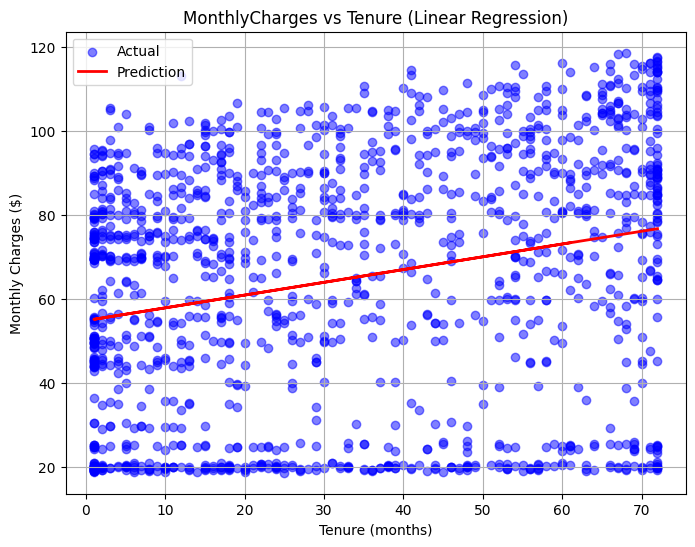

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.title("MonthlyCharges vs Tenure (Linear Regression)")
plt.xlabel("Tenure (months)")
plt.ylabel("Monthly Charges ($)")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Mean Squared Error: 830.1524318957313
R² Score: 0.060672142125989925
Intercept: 54.88098151309516
Coefficient: 0.3035831729151214
